# Fractional-order Chaos Gallery

[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/brainpy/examples/blob/main/classical_dynamical_systems/fractional_order_chaos.ipynb)
[![Open in Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/brainpy/examples/blob/main/classical_dynamical_systems/fractional_order_chaos.ipynb)

In [1]:
import brainpy as bp

import matplotlib.pyplot as plt

In [24]:
bp.__version__

'2.4.3'

In [2]:
def plot_runner_3d(runner):
  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111, projection='3d')
  plt.plot(runner.mon.x.flatten(),
           runner.mon.y.flatten(),
           runner.mon.z.flatten())
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  plt.show()

In [3]:
def plot_runner_2d(runner):
  plt.figure(figsize=(12, 6))
  plt.subplot(121)
  plt.plot(runner.mon.x.flatten(), runner.mon.y.flatten())
  plt.xlabel('x')
  plt.ylabel('y')
  plt.subplot(122)
  plt.plot(runner.mon.x.flatten(), runner.mon.z.flatten())
  plt.xlabel('x')
  plt.ylabel('z')
  plt.show()

## Fractional-order Chua system

The fractional-order Chua’s system is given by [1]

$$
\left\{\begin{array}{l}
D^{\alpha_{1}} x=a\{y- (1+m_1) x-0.5*(m_0-m_1)*(|x+1|-|x-1|)\} \\
D^{\alpha_{2}} y=x-y+z \\
D^{\alpha_{3}} z=-b y-c z
\end{array}\right.
$$


In [4]:
a, b, c = 10.725, 10.593, 0.268
m0, m1 = -1.1726, -0.7872


def chua_system(x, y, z, t):
  f = m1 * x + 0.5 * (m0 - m1) * (abs(x + 1) - abs(x - 1))
  dx = a * (y - x - f)
  dy = x - y + z
  dz = -b * y - c * z
  return dx, dy, dz

In [5]:
dt = 0.001
duration = 200
inits = [0.2, -0.1, 0.1]

integrator = bp.fde.GLShortMemory(chua_system,
                                  alpha=[0.93, 0.99, 0.92],
                                  num_memory=1000,
                                  inits=inits)

runner = bp.IntegratorRunner(integrator,
                             monitors=list('xyz'),
                             inits=inits,
                             dt=dt)
runner.run(duration)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


  0%|          | 0/200000 [00:00<?, ?it/s]

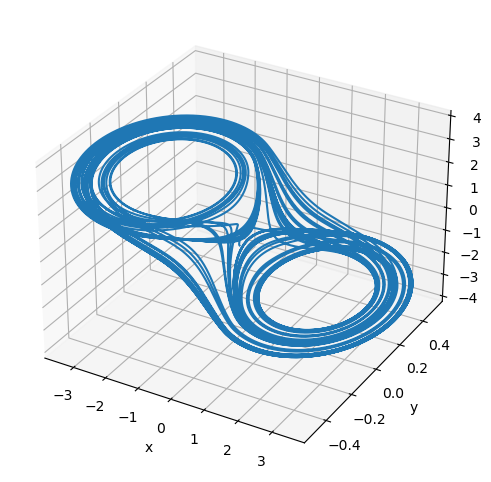

In [6]:
plot_runner_3d(runner)

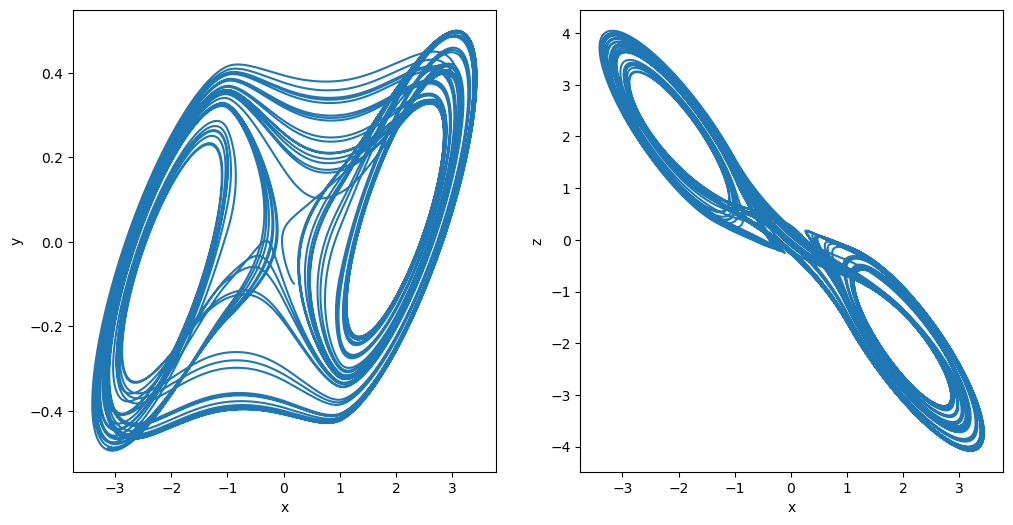

In [7]:
plot_runner_2d(runner)

## Fractional-order Qi System

The fractional-order Qi chaotic system is given by

$$
\left\{\begin{array}{l}
D^{\alpha} x_{1}=a\left(x_{1}-x_{2}\right)+x_{2} x_{3} \\
D^{\alpha} x_{2}=c x_{1}-x_{2}-x_{1} x_{3} \\
D^{\alpha} x_{3}=x_{1} x_{2}-b x_{3}
\end{array}\right.
$$


In [8]:
a, b, c = 35, 8 / 3, 80


def qi_system(x, y, z, t):
  dx = -a * x + a * y + y * z
  dy = c * x - y - x * z
  dz = -b * z + x * y
  return dx, dy, dz

In [9]:
dt = 0.001
duration = 200
inits = [0.1, 0.2, 0.3]

integrator = bp.fde.GLShortMemory(qi_system,
                                  alpha=0.98,
                                  num_memory=1000,
                                  inits=inits)

runner = bp.IntegratorRunner(integrator,
                             monitors=list('xyz'),
                             inits=inits,
                             dt=dt)
runner.run(duration)

  0%|          | 0/200000 [00:00<?, ?it/s]

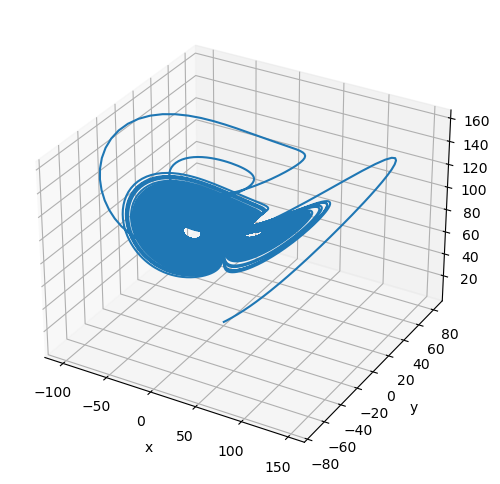

In [10]:
plot_runner_3d(runner)

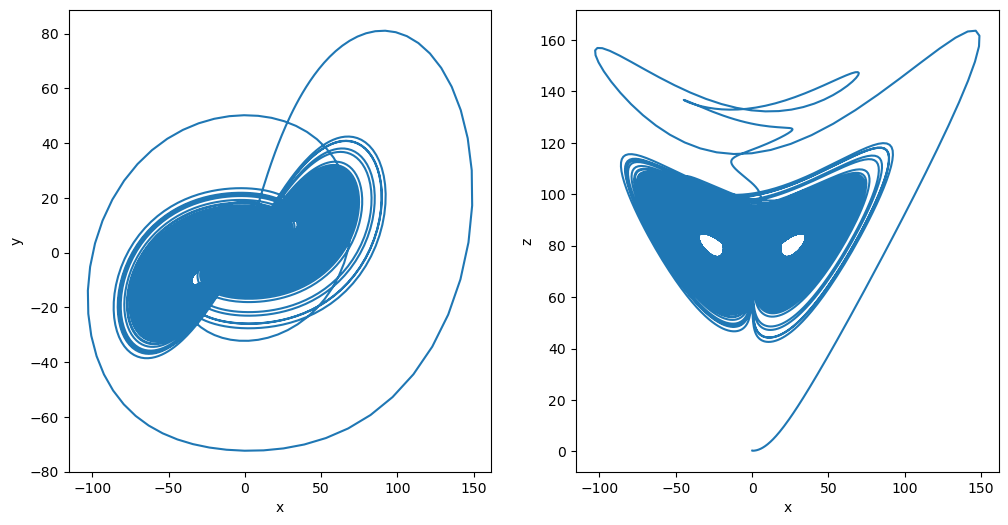

In [11]:
plot_runner_2d(runner)

## Fractional-order Lorenz System

The fractional-order Lorenz system is given by [3]

$$
\left\{\begin{array}{l}
D^{\alpha} x=a\left(y-x\right) \\
D^{\alpha} y= x * (b - z) - y \\
D^{\alpha} z =x * y - c * z
\end{array}\right.
$$



In [12]:
a, b, c = 10, 28, 8 / 3


def lorenz_system(x, y, z, t):
  dx = a * (y - x)
  dy = x * (b - z) - y
  dz = x * y - c * z
  return dx, dy, dz

In [13]:
dt = 0.001
duration = 50
inits = [1, 2, 3]

integrator = bp.fde.GLShortMemory(lorenz_system,
                                  alpha=0.99,  # fractional order
                                  num_memory=1000,
                                  inits=inits)

runner = bp.IntegratorRunner(integrator,
                             monitors=list('xyz'),
                             inits=inits,
                             dt=dt)
runner.run(duration)

  0%|          | 0/50000 [00:00<?, ?it/s]

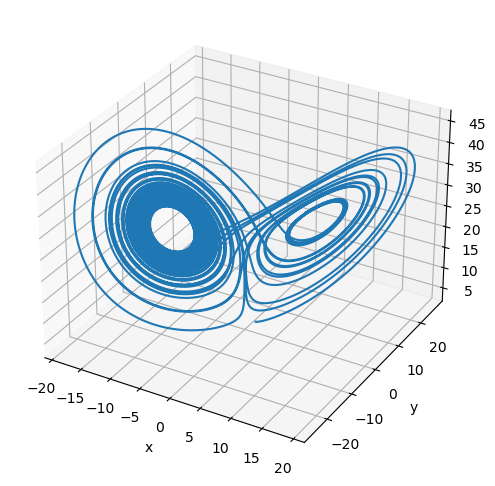

In [14]:
plot_runner_3d(runner)

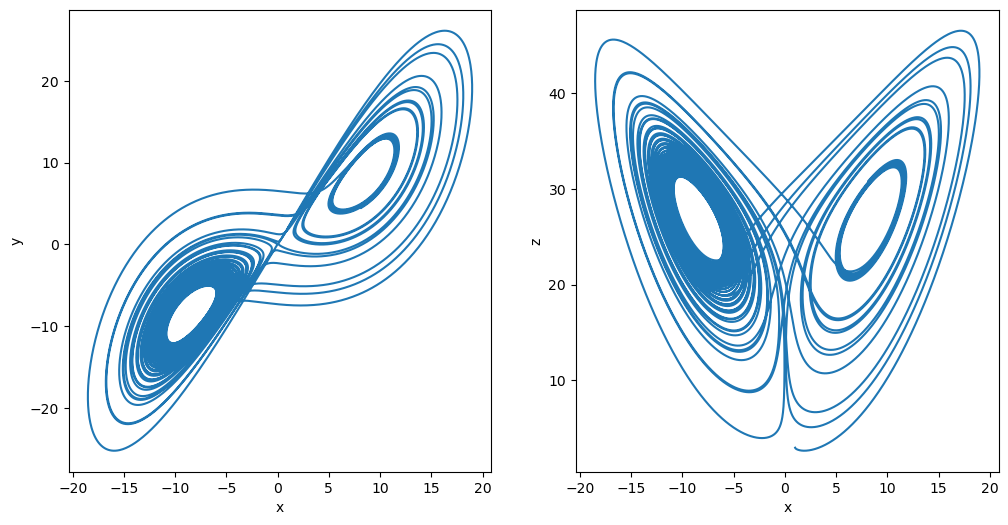

In [15]:
plot_runner_2d(runner)

## Fractional-order Liu System

The fractional order system is given by [4]

$$
\begin{aligned}
&D^{\alpha_{1}} x=-a x-e y^{2} \\
&D^{\alpha_{2}} y=b y-n x z \\
&D^{\alpha_{3}} z=-c z+m x y
\end{aligned}
$$


In [16]:
a, b, c, e, n, m = 1, 2.5, 5, 1, 4, 4


def liu_system(x, y, z, t):
  dx = -a * x - e * y ** 2
  dy = b * y - n * x * z
  dz = -c * z + m * x * y
  return dx, dy, dz

In [17]:
dt = 0.001
duration = 100
inits = [0.2, 0, 0.5]

integrator = bp.fde.GLShortMemory(liu_system,
                                  alpha=0.95,  # fractional order
                                  num_memory=1000,
                                  inits=inits)

runner = bp.IntegratorRunner(integrator,
                             monitors=list('xyz'),
                             inits=inits,
                             dt=dt)
runner.run(duration)

  0%|          | 0/100000 [00:00<?, ?it/s]

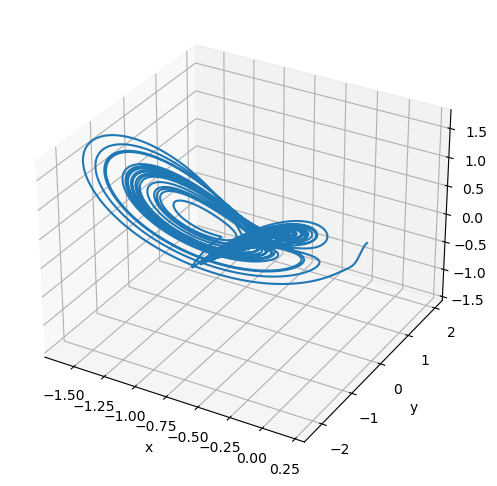

In [18]:
plot_runner_3d(runner)

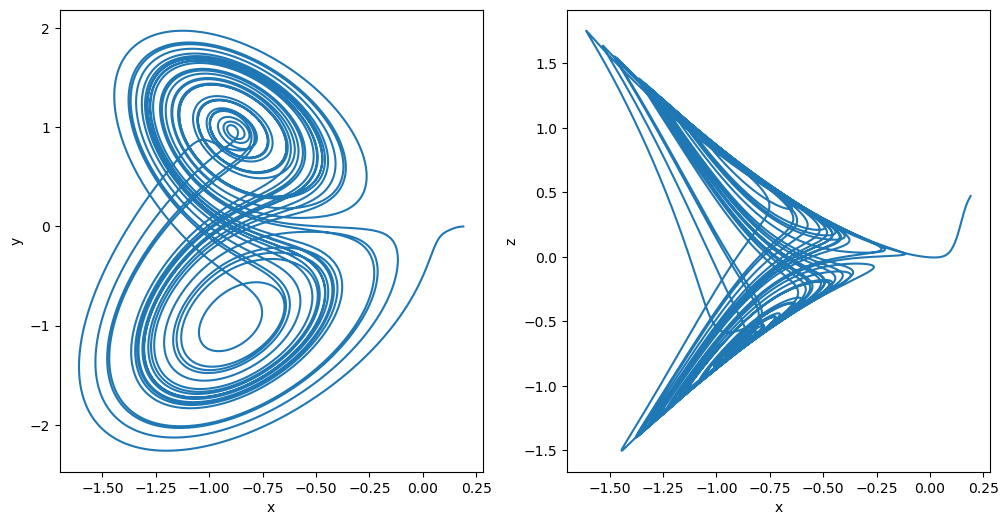

In [19]:
plot_runner_2d(runner)

## Fractional-order Chen System

The system is given by [5]

$$
\begin{aligned}
&\frac{\mathrm{d}^{q} x}{\mathrm{~d} t^{9}}=a(y-x), \\
&\frac{\mathrm{d}^{q} y}{\mathrm{~d} t^{q}}= d x-x z+c y, \\
&\frac{\mathrm{d}^{q} z}{\mathrm{~d} t^{9}}=x y-b z,
\end{aligned}
$$


In [20]:
a, b, c, d = 35, 3, 28, -7


def chen_system(x, y, z, t):
  dx = a * (y - x)
  dy = d * x - x * z + c * y
  dz = x * y - b * z
  return dx, dy, dz

In [21]:
dt = 0.005
duration = 50
inits = [-9, -5, 14]

integrator = bp.fde.GLShortMemory(chen_system,
                                  alpha=0.9,  # fractional order
                                  num_memory=1000,
                                  inits=inits)

runner = bp.IntegratorRunner(integrator,
                             monitors=list('xyz'),
                             inits=inits,
                             dt=dt)
runner.run(duration)

  0%|          | 0/10000 [00:00<?, ?it/s]

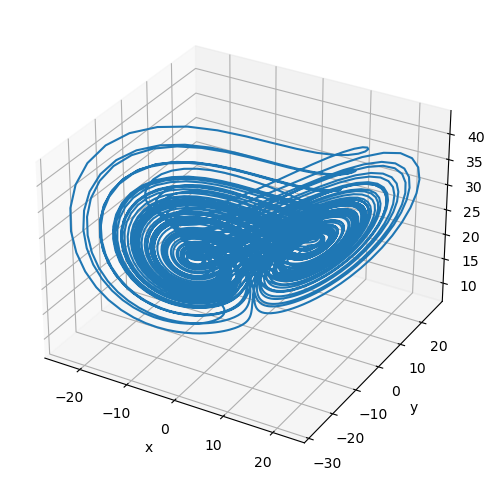

In [22]:
plot_runner_3d(runner)

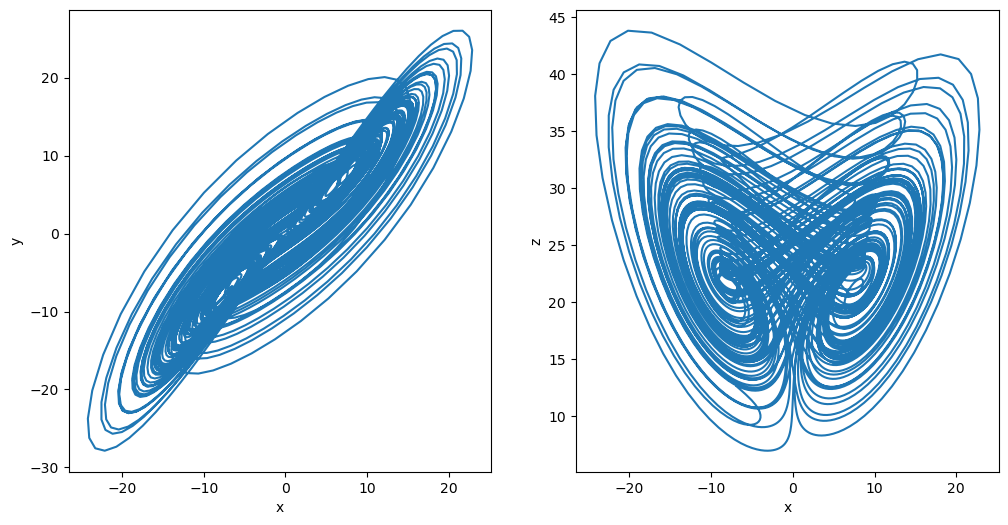

In [23]:
plot_runner_2d(runner)

## References

- [1] Petráš, Ivo. "A note on the fractional-order Chua’s system." Chaos, Solitons & Fractals 38.1 (2008): 140-147.
- [2] Wu, Xiangjun, and Yang Yang. "Chaos in the fractional-order Qi system and its synchronization using active control." 2010 International Conference on Intelligent Computing and Cognitive Informatics. IEEE, 2010.
- [3] Wu, Xiang-Jun, and Shi-Lei Shen. "Chaos in the fractional-order Lorenz system." International Journal of Computer Mathematics 86.7 (2009): 1274-1282.
- [4] Daftardar-Gejji, Varsha, and Sachin Bhalekar. "Chaos in fractional ordered Liu system." Computers & mathematics with applications 59.3 (2010): 1117-1127.
- [5] Lu, Jun Guo, and Guanrong Chen. "A note on the fractional-order Chen system." Chaos, Solitons & Fractals 27.3 (2006): 685-688.